In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve



In [ ]:
import pandas as pd

# Assuming your text data is encoded in UTF-8
df = pd.read_csv('/content/drive/MyDrive/FYP 2024/DATASET/women_final.csv', encoding='utf-8')

# Now proceed with the rest of your code


In [ ]:
df.head()

,id,text,Section 326 in The Indian Penal Code,Section 354 in The Indian Penal Code,Section 375 in The Indian Penal Code,Section 376 in The Indian Penal Code,Section 509 in The Indian Penal Code
0,100122782,petitioner is a medical practitioner having a ...,1,0,0,0,0
1,100320038,heard learned counsel for the applicant and le...,1,0,0,0,0
2,100322375,the name of the petitionerprosecutrix has not ...,0,0,0,1,0
3,100652277,cases in which his son is involved the said re...,1,0,0,0,0
4,148537891,this is first bail application filed by the ap...,1,0,0,0,0


In [ ]:
###Drop Nan Values
df=df.dropna()


In [ ]:
# Drop the specified columns to get the independent features
X = df.drop(['id','Section 326 in The Indian Penal Code', 'Section 354 in The Indian Penal Code', 'Section 375 in The Indian Penal Code', 'Section 376 in The Indian Penal Code', 'Section 509 in The Indian Penal Code'], axis=1)


In [ ]:
y = df[['Section 354 in The Indian Penal Code']]

In [ ]:
y.value_counts()

Section 354 in The Indian Penal Code
0                                       6340
1                                        380
Name: count, dtype: int64

In [ ]:
X.shape

(6720, 1)

In [ ]:
y.shape

(6720, 1)

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
### Vocabulary size
voc_size=5000

### Onehot Representation

In [ ]:
messages=X.copy()

In [ ]:
messages['text'][1]

'heard learned counsel for the applicant and learned aga for the state by means of this application the applicant who is involved in case crime no  of  under sections a ipc police station kaptanganj district kushinagar is seeking enlargement on bail during the trial submission made by learned counsel for the applicant is that fir was registered under sections a ipc against three accused persons smt kaushalya devi motherinlaw ajay yadav husband and rahul yadav dewar further before issuing the release order the sureties be verified i the applicant shall file an undertaking to the effect that he shall not seek any adjournment on the date fixed for evidence when the witnesses are present in court in case of default of this condition it shall be open for the trial court to treat it as abuse of liberty of bail and pass orders in accordance with law ii the applicant shall remain present before the trial court on each date fixed either personally or through his counsel in case of his absence w

In [ ]:
messages.reset_index(inplace=True)

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909

In [ ]:
corpus

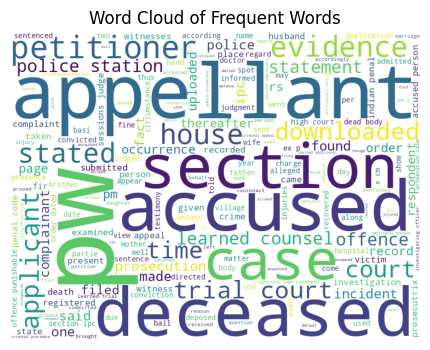

In [ ]:
# Word cloud for most frequent words

corpus = ' '.join(df['text'].str.lower().apply(lambda x: ' '.join([word for word in x.split()])))
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(corpus)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Frequent Words')
plt.show()

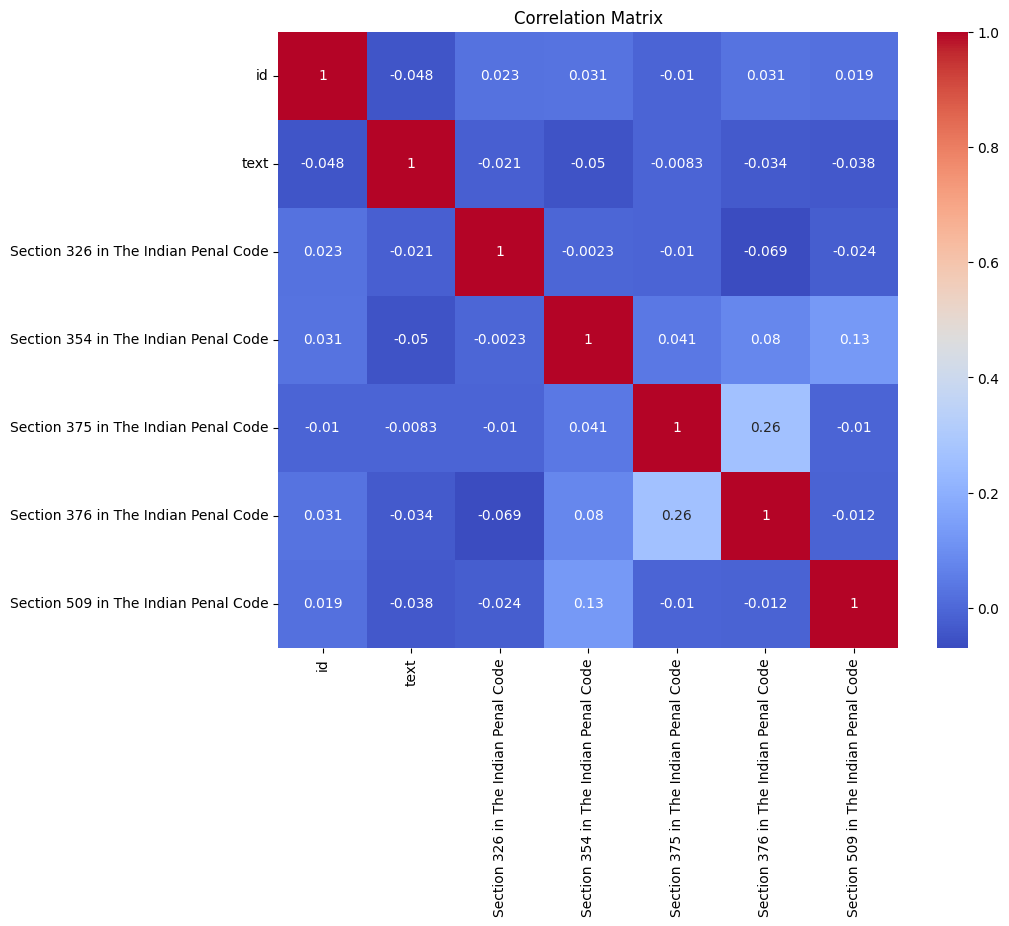

In [ ]:
# Convert non-numeric columns to numeric representation
from sklearn.preprocessing import LabelEncoder

df_numeric = df.copy()

# Iterate through columns
for col in df_numeric.columns:
    if df_numeric[col].dtype == 'object':  # Check if column is non-numeric
        le = LabelEncoder()
        df_numeric[col] = le.fit_transform(df_numeric[col])

# Now, you can plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
if len(y.columns) > 1:
  fig, axs = plt.subplots(2, 2, figsize=(10, 10))
  i = 0
  for col in y.columns:
    sns.countplot(y[col], ax=axs[int(i/2), i%2])
    axs[int(i/2), i%2].set_title(col)
    i += 1
  plt.tight_layout()
  plt.show()

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

Output hidden; open in https://colab.research.google.com to view.

### Embedding Representation

In [ ]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...    0    0 1286]
 [   0    0    0 ...    0    0 2299]
 [   0    0    0 ...    0    0  499]
 ...
 [   0    0    0 ...    0    0 4120]
 [   0    0    0 ...    0    0 4016]
 [   0    0    0 ...    0    0 4621]]


In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0, 1286], dtype=int32)

In [ ]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
## Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirection  (None, 200)               112800    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313001 (1.19 MB)
Trainable params: 313001 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape

(35657887, (6720, 1))

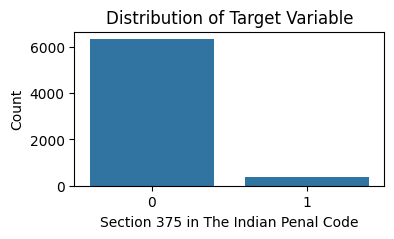

In [ ]:
plt.figure(figsize=(4,2))
sns.countplot(x='Section 354 in The Indian Penal Code', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Section 375 in The Indian Penal Code')
plt.ylabel('Count')
plt.show()

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((35657887, 20), (6720, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

### Model Training

In [ ]:
### Finally Training
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
71/71 [==============================] - 17s 154ms/step - loss: 0.2946 - accuracy: 0.9365 - val_loss: 0.2244 - val_accuracy: 0.9396
Epoch 2/10
71/71 [==============================] - 4s 55ms/step - loss: 0.1941 - accuracy: 0.9454 - val_loss: 0.2221 - val_accuracy: 0.9396
Epoch 3/10
71/71 [==============================] - 4s 50ms/step - loss: 0.1535 - accuracy: 0.9467 - val_loss: 0.2492 - val_accuracy: 0.9360
Epoch 4/10
71/71 [==============================] - 2s 29ms/step - loss: 0.1088 - accuracy: 0.9567 - val_loss: 0.2937 - val_accuracy: 0.9333
Epoch 5/10
71/71 [==============================] - 2s 24ms/step - loss: 0.0891 - accuracy: 0.9656 - val_loss: 0.3650 - val_accuracy: 0.9216
Epoch 6/10
71/71 [==============================] - 2s 35ms/step - loss: 0.0729 - accuracy: 0.9725 - val_loss: 0.3668 - val_accuracy: 0.9247
Epoch 7/10
71/71 [==============================] - 2s 22ms/step - loss: 0.0647 - accuracy: 0.9776 - val_loss: 0.3495 - val_accuracy: 0.9170
Epoch 8/10


### Performance Metrics And Accuracy

In [ ]:
y_pred_prob = model1.predict(X_test)  # Get the predicted probabilities for each class
y_pred = (y_pred_prob > 0.5).astype(int)  # Apply a threshold (0.5 in this case) to obtain the predicted classes


70/70 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[2017,   67],
       [ 123,   11]])

In [ ]:
print(confusion_matrix)

<function confusion_matrix at 0x7863d77ee9e0>


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9143372407574392

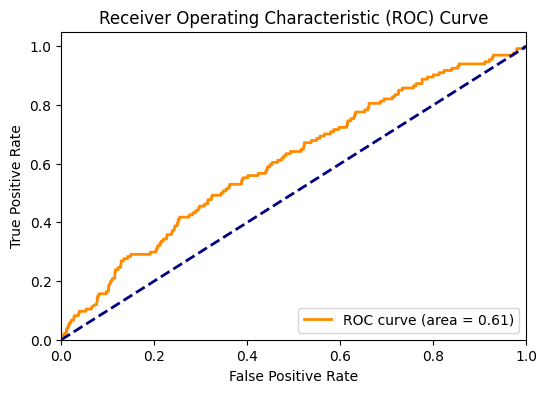

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

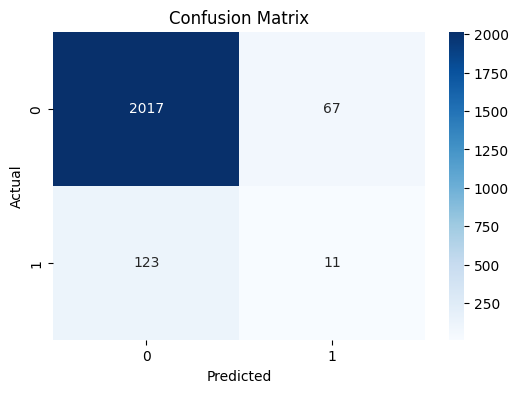

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

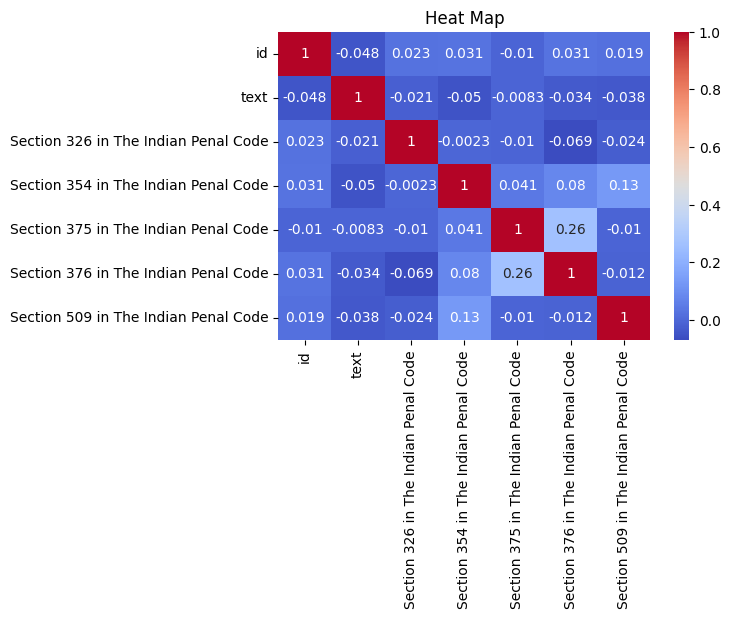

In [ ]:
# Convert non-numeric columns to numeric representation
from sklearn.preprocessing import LabelEncoder

df_numeric = df.copy()

# Iterate through columns
for col in df_numeric.columns:
    if df_numeric[col].dtype == 'object':  # Check if column is non-numeric
        le = LabelEncoder()
        df_numeric[col] = le.fit_transform(df_numeric[col])

# Now, you can plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Heat Map')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2094
           1       0.15      0.08      0.10       124

    accuracy                           0.92      2218
   macro avg       0.55      0.53      0.53      2218
weighted avg       0.90      0.92      0.91      2218

